<a href="https://colab.research.google.com/github/toskpl/Challenge_DW/blob/master/part2/day4/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""import bibliotek"""
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical
import numpy as np
np.random.seed(2018)
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
"""wczytanie zbioru danych cifar10"""

(X_train, y_train), (X_test,y_test) = cifar10.load_data()

#zbior train / test
#50 000 / 10 000zdjęć
#32
#32
#3 kanal zdjecia kolorowe

X_train.shape, X_test.shape

170500096/170498071 [==============================] - 4s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

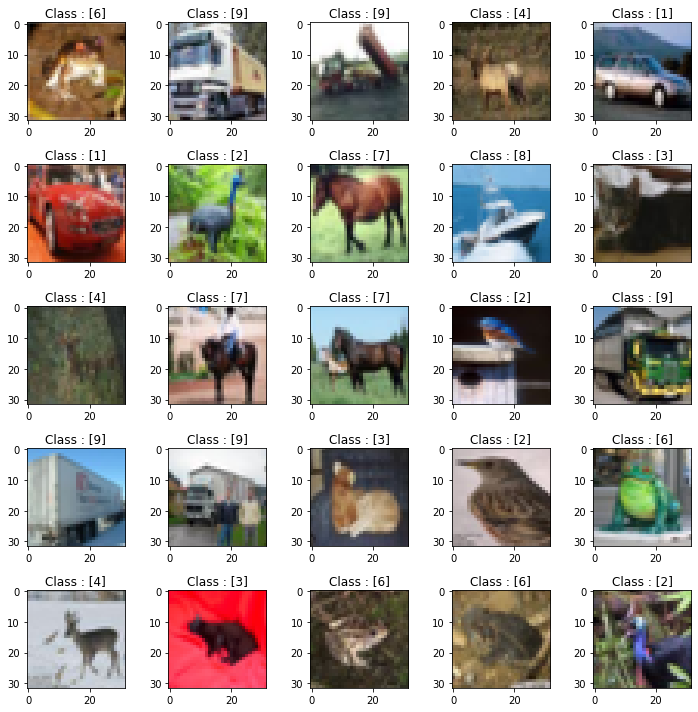

In [0]:
plt.figure(figsize=(10,10))
for idx in range(25):
    plt.subplot(5,5, idx+1)
    plt.imshow(X_train[idx], cmap ='gray')
    plt.title('Class : {}'.format(y_train[idx]))

plt.tight_layout()

In [0]:
img_rows, img_cols = X_train.shape[1],X_train.shape[2]

num_channels = 3 #kanal 3 zdjecia kolorowe RGB
X_train = X_train.reshape(-1,img_rows,img_cols,num_channels)
X_test = X_test.reshape(-1,img_rows,img_cols,num_channels)

#rozmiar input + kanał
input_shape = (img_rows, img_cols,num_channels)


X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
#normalizacja
if np.max(X_train)>1: X_train = X_train /255
if np.max(X_test)>1: X_test = X_test /255

In [0]:
#weryfikacja normazlizaji dla: 
# train
# test
X_train.max(),X_train.min(),X_test.max(),X_test.min()

(1.0, 0.0, 1.0, 0.0)

In [0]:
if len(y_train.shape) ==2:
    y_train = y_train.reshape(-1)
    y_test = y_test.reshape(-1)

if len(y_train.shape) ==1:
    num_classes = len(set(y_train))
    y_train = to_categorical(y_train ,num_classes)
    y_test = to_categorical(y_test ,num_classes)

In [0]:
"""weryfikacja rozmiarow"""
#train 50 000 elementów 10 class
#test 10 000 elementow, 10 class
#num_classes 10 class
y_train.shape,y_test.shape,num_classes

((50000, 10), (10000, 10), 10)

In [0]:
""" architektura modelu """
model = Sequential([
    Conv2D(filters = 32, kernel_size= (3,3),input_shape = input_shape),
    MaxPool2D(pool_size = (2,2)),
    Dropout(0.25),
    
    Conv2D(filters = 64, kernel_size= (3,3)),
    MaxPool2D(pool_size = (2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512,activation = 'relu'),
    Dropout(0.5),    
    Dense(num_classes,activation = 'softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)             

In [0]:
""" kompilacja modelu"""
# optymalizator adam, 
# metryka accuracy, 
# loss = klasyfikacja birnana w keras
model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

# Trenowanie

In [0]:
model.fit(
    X_train,y_train,
    batch_size = 256,
    epochs = 2,verbose=2,
    validation_data=(X_test,y_test)
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
 - 67s - loss: 1.5659 - acc: 0.4417 - val_loss: 1.4136 - val_acc: 0.4946
Epoch 2/2
 - 67s - loss: 1.2841 - acc: 0.5470 - val_loss: 1.1222 - val_acc: 0.6061


In [0]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 5s 465us/step


[1.1222468545913695, 0.6061]

# Jedna epoka liczyła się ponad 65 sek , val_acc: 0.6061